In [1]:
import scipy.io
import scipy.ndimage
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy import sparse
import matplotlib.pyplot as plt
from functools import partial

import torch
from Solver import *
# from NeuralNet import *
from timeit import default_timer

import sys
sys.path.append('../Utility')
import NeuralNet
import Numerics
import PlotDefault

In [2]:
L = 1.0
Ny = 100
yy = np.linspace(0.0, L, Ny)
dy = yy[1] - yy[0]
f = -np.ones_like(yy)
dbc = np.array([0.0, 0.0]) 

In [3]:
# Training data
xx, f, q, q_c, dq_c = generate_data()

dq = np.copy(q)
ddq = np.copy(q)
for i in range(q.shape[0]):
    dq[i, :]  = Numerics.gradient_first(q[i,:], dy, bc = "one-sided")
    ddq[i, :] = Numerics.gradient_second(q[i,:], dy, bc = "one-sided")
  

1000 max q:  0.16121713125089415  L2 res:  9.006589965773953e-08
2000 max q:  0.16121713125089415  L2 res:  2.5831738042252595e-12
error dq =  3.3195976606089355e-14
1000 max q:  0.2279954535018984  L2 res:  7.766404910573975e-05
2000 max q:  0.22799545350189795  L2 res:  3.966373771960062e-11
error dq =  2.705400320909041e-13
1000 max q:  0.27923626237712057  L2 res:  0.0015394363709458274
2000 max q:  0.27923626237704907  L2 res:  9.388671836159344e-09
error dq =  5.2460729033929255e-11
1000 max q:  0.32243426250344814  L2 res:  0.009828408253934669
2000 max q:  0.3224342625017884  L2 res:  2.707726100497486e-07
error dq =  1.316756100483198e-09
1000 max q:  0.3604924646293558  L2 res:  0.03602553256251438
2000 max q:  0.36049246461450524  L2 res:  2.7876509006114182e-06
error dq =  1.217447204959385e-08
1000 max q:  0.3948997094360756  L2 res:  0.0955937088791259
2000 max q:  0.39489970935999474  L2 res:  1.5888408717909182e-05
error dq =  6.356813067398487e-08
1000 max q:  0.426540

In [4]:
# Test data
def f_func1(xx_test):
    return 6*(1-2*xx_test)**2 - 2*(xx_test - xx_test**2)*(1 - 2*xx_test)**2 + 2*(xx_test - xx_test**2)**2 + 2


def f_func2(xx_test):
    
    f = np.ones_like(xx_test)
    f[xx_test <= 0.5] = 0.0
    f[xx_test > 0.5] = 10.0
    return f

def f_func3(xx_test):
    L = 1
    return 10*np.sin(2*np.pi*xx_test/L)

f_funcs = [f_func1, f_func2, f_func3]

xx_test, f_test, q_test, q_c_test, dq_c_test = np.zeros((3, Ny)), np.zeros((3, Ny)), np.zeros((3, Ny)), np.zeros((3, Ny-1)), np.zeros((3, Ny-1))

for i in range(3):
    
    f_func = f_funcs[i]
    xx_test[i,:], f_test[i,:], q_test[i,:], q_c_test[i,:], dq_c_test[i,:] = generate_data_helper(permeability_ref, f_func, L=1.0, Nx = 100)
    

dq_test = np.copy(q_test)
ddq_test = np.copy(q_test)
for i in range(q_test.shape[0]):
    dq_test[i, :]  = Numerics.gradient_first(q_test[i,:], dy, bc = "one-sided")
    ddq_test[i, :] = Numerics.gradient_second(q_test[i,:], dy, bc = "one-sided")
  


1 max q:  0.0038705131619274583  L2 res:  42.60868807004445
2 max q:  0.0072298683603267255  L2 res:  42.293793127645394
3 max q:  0.010684537248754506  L2 res:  50.79515939886769
4 max q:  0.013683588356192626  L2 res:  49.850750548087795
5 max q:  0.01665332412948695  L2 res:  49.510942769766324
6 max q:  0.019381188634587494  L2 res:  46.42742724516324
7 max q:  0.02202536199089977  L2 res:  44.72930397928942
8 max q:  0.024875186086856172  L2 res:  42.097677379178826
9 max q:  0.02720475392738576  L2 res:  40.3527157633579
10 max q:  0.029949288424052634  L2 res:  38.544676286173605
11 max q:  0.03224337564356567  L2 res:  37.20733347305143
12 max q:  0.0346865490742784  L2 res:  35.95523913093863
13 max q:  0.03706893040954448  L2 res:  34.99053667761754
14 max q:  0.03912724916025979  L2 res:  34.09518957034999
15 max q:  0.041546201483239786  L2 res:  33.373622357315256
16 max q:  0.04367109918000198  L2 res:  32.72448579668323
17 max q:  0.04563566280643234  L2 res:  32.1493515

152 max q:  0.20162445211343252  L2 res:  15.462347357991407
153 max q:  0.2025222219411496  L2 res:  15.398043624973745
154 max q:  0.20341000559856012  L2 res:  15.333788454739938
155 max q:  0.20428779272347153  L2 res:  15.269577166077177
156 max q:  0.20515561168211394  L2 res:  15.20540513662612
157 max q:  0.20601353078609413  L2 res:  15.141267822401218
158 max q:  0.20690042031864564  L2 res:  15.077160739031392
159 max q:  0.20780900762740115  L2 res:  15.01307942481966
160 max q:  0.20870830589655745  L2 res:  14.949019410195971
161 max q:  0.20959828047916834  L2 res:  14.884976207564609
162 max q:  0.2104789256232777  L2 res:  14.820945320176767
163 max q:  0.21135026612697452  L2 res:  14.756922258638207
164 max q:  0.21221235793856957  L2 res:  14.692902553090956
165 max q:  0.21311638494622218  L2 res:  14.628881755504489
166 max q:  0.21402585503810298  L2 res:  14.564855434080158
167 max q:  0.2149265969311051  L2 res:  14.500819165831322
168 max q:  0.215818590083722

289 max q:  0.32079662043499024  L2 res:  6.702204899795178
290 max q:  0.32137260678997676  L2 res:  6.649380262074183
291 max q:  0.3219433445522971  L2 res:  6.596872684213405
292 max q:  0.32250888346996326  L2 res:  6.54468215662511
293 max q:  0.3230692728766768  L2 res:  6.492808618878223
294 max q:  0.3236245616820124  L2 res:  6.441251961660016
295 max q:  0.32417479836291624  L2 res:  6.390012028631267
296 max q:  0.3247200309564294  L2 res:  6.33908861818115
297 max q:  0.3252603070535511  L2 res:  6.288481485087902
298 max q:  0.3257956737941604  L2 res:  6.238190342091093
299 max q:  0.3263261778629194  L2 res:  6.188214861381051
300 max q:  0.32685186548608536  L2 res:  6.1385546760108225
301 max q:  0.32737278242916334  L2 res:  6.089209381235687
302 max q:  0.32788897399533457  L2 res:  6.040178535785114
303 max q:  0.3284004850245992  L2 res:  5.99146166307172
304 max q:  0.3289073598935764  L2 res:  5.94305825234153
305 max q:  0.3294096425159079  L2 res:  5.894967759

430 max q:  0.3668005924229446  L2 res:  1.9836709839944155
431 max q:  0.36696013563731295  L2 res:  1.965677107649064
432 max q:  0.36711821200085587  L2 res:  1.947838475261549
433 max q:  0.3672748346063079  L2 res:  1.9301538974222239
434 max q:  0.367430016435236  L2 res:  1.9126221909374879
435 max q:  0.3675837703589387  L2 res:  1.8952421788584923
436 max q:  0.3677361091393362  L2 res:  1.8780126905081398
437 max q:  0.3678870454298522  L2 res:  1.8609325615064063
438 max q:  0.36803659177628695  L2 res:  1.8440006337940291
439 max q:  0.36818476061768246  L2 res:  1.8272157556545896
440 max q:  0.36833156428717934  L2 res:  1.8105767817350258
441 max q:  0.36847701501286584  L2 res:  1.7940825730646297
442 max q:  0.3686211249186194  L2 res:  1.7777319970725327
443 max q:  0.3687639060249405  L2 res:  1.761523927603735
444 max q:  0.368905370249779  L2 res:  1.7454572449337171
445 max q:  0.36904552940935315  L2 res:  1.7295308357816384
446 max q:  0.369184395218962  L2 res:

622 max q:  0.3811074509535912  L2 res:  0.3297121326274532
623 max q:  0.3811337130081942  L2 res:  0.3266021234642807
624 max q:  0.3811597269380077  L2 res:  0.32352123408725164
625 max q:  0.38118549507414756  L2 res:  0.32046919590725476
626 max q:  0.38121101972607474  L2 res:  0.31744574273552406
627 max q:  0.3812363031817922  L2 res:  0.31445061076364544
628 max q:  0.3812613477080395  L2 res:  0.3114835385437269
629 max q:  0.3812861555504862  L2 res:  0.30854426696868664
630 max q:  0.38131072893392337  L2 res:  0.3056325392526857
631 max q:  0.3813350700624533  L2 res:  0.30274810091169785
632 max q:  0.381359181119678  L2 res:  0.29989069974421007
633 max q:  0.3813830642688854  L2 res:  0.297060085812062
634 max q:  0.3814067216532347  L2 res:  0.2942560114214262
635 max q:  0.38143015539593955  L2 res:  0.29147823110391297
636 max q:  0.3814533676004498  L2 res:  0.2887265015978168
637 max q:  0.3814763603506316  L2 res:  0.2860005818294884
638 max q:  0.3814991357109462

817 max q:  0.38344743582396945  L2 res:  0.05155813436529453
818 max q:  0.38345153686881117  L2 res:  0.0510687857206833
819 max q:  0.3834555989802017  L2 res:  0.05058407633329096
820 max q:  0.38345962252743077  L2 res:  0.05010396232001582
821 max q:  0.38346360787629163  L2 res:  0.04962840021097368
822 max q:  0.3834675553891139  L2 res:  0.04915734694564409
823 max q:  0.38347146542479627  L2 res:  0.04869075986904096
824 max q:  0.38347533833883873  L2 res:  0.048228596727938874
825 max q:  0.383479174483375  L2 res:  0.04777081566711534
826 max q:  0.38348297420720395  L2 res:  0.047317375225637566
827 max q:  0.38348673785582127  L2 res:  0.046868234333178445
828 max q:  0.3834904657714506  L2 res:  0.04642335230637036
829 max q:  0.3834941582930743  L2 res:  0.04598268884519063
830 max q:  0.3834978157564644  L2 res:  0.04554620402937591
831 max q:  0.3835014384942124  L2 res:  0.04511385831487839
832 max q:  0.38350502683575965  L2 res:  0.04468561253034957
833 max q:  0.

987 max q:  0.3837940064144956  L2 res:  0.010181432254121265
988 max q:  0.3837948161060469  L2 res:  0.010084709797698899
989 max q:  0.3837956181052472  L2 res:  0.00998890598907828
990 max q:  0.3837964124851639  L2 res:  0.009894012107021299
991 max q:  0.3837971993181703  L2 res:  0.009800019513009826
992 max q:  0.3837979786759527  L2 res:  0.009706919650469822
993 max q:  0.3837987506295166  L2 res:  0.009614704043989813
994 max q:  0.3837995152491933  L2 res:  0.009523364298552408
995 max q:  0.3838002726046463  L2 res:  0.009432892098772898
996 max q:  0.38380102276487743  L2 res:  0.009343279208144636
997 max q:  0.3838017657982335  L2 res:  0.009254517468298928
998 max q:  0.38380250177241215  L2 res:  0.009166598798251888
999 max q:  0.3838032307544683  L2 res:  0.009079515193684749
1000 max q:  0.3838039528108201  L2 res:  0.008993258726209992
Last step increment is :  4.474783463744473e-06  last step is :  2.6983942562311984
1 max q:  0.005  L2 res:  70.0
2 max q:  0.01 

166 max q:  0.4269649793543791  L2 res:  17.02637851529188
167 max q:  0.42783773951988113  L2 res:  16.909936102114948
168 max q:  0.42870116247506257  L2 res:  16.793534497064314
169 max q:  0.42955537305963803  L2 res:  16.6771901997101
170 max q:  0.4304004975877595  L2 res:  16.5609197035621
171 max q:  0.43123666361910884  L2 res:  16.444739435447904
172 max q:  0.4320639996897751  L2 res:  16.328665701437675
173 max q:  0.4328826350121865  L2 res:  16.212714642017076
174 max q:  0.43369269915295655  L2 res:  16.096902193827066
175 max q:  0.43449432169692603  L2 res:  15.98124405988378
176 max q:  0.43528763190503494  L2 res:  15.86575568556525
177 max q:  0.436072758373002  L2 res:  15.75045224165835
178 max q:  0.43684982869715194  L2 res:  15.635348611806142
179 max q:  0.43761896915311643  L2 res:  15.520459385217492
180 max q:  0.4383803043925392  L2 res:  15.405798852143057
181 max q:  0.43913395716230524  L2 res:  15.291381002738836
182 max q:  0.4398800480501788  L2 res:

334 max q:  0.5093295285895483  L2 res:  3.6814344476155125
335 max q:  0.5095372444859414  L2 res:  3.6433734666193893
336 max q:  0.5097427873092751  L2 res:  3.605678408735738
337 max q:  0.5099461787909144  L2 res:  3.568346347149404
338 max q:  0.5101474404613073  L2 res:  3.531374365363139
339 max q:  0.5103465936515551  L2 res:  3.4947595574944383
340 max q:  0.5105436594949828  L2 res:  3.4584990285619854
341 max q:  0.510738658928708  L2 res:  3.422589894762021
342 max q:  0.5109316126952067  L2 res:  3.3870292837348046
343 max q:  0.5111225413438765  L2 res:  3.3518143348213982
344 max q:  0.5113114652325955  L2 res:  3.3169421993109633
345 max q:  0.5114984045292758  L2 res:  3.282410040678842
346 max q:  0.5116833792134122  L2 res:  3.2482150348155283
347 max q:  0.5118704132637814  L2 res:  3.2143543702468373
348 max q:  0.5120646255619061  L2 res:  3.180825248345377
349 max q:  0.5122567886042044  L2 res:  3.147624883533571
350 max q:  0.512446922936918  L2 res:  3.114750

506 max q:  0.5267213743425064  L2 res:  0.5763390685298447
507 max q:  0.5267558685357159  L2 res:  0.5700362480657366
508 max q:  0.5267899847967261  L2 res:  0.5638016860485217
509 max q:  0.5268237272343848  L2 res:  0.5576346578865169
510 max q:  0.5268570999135589  L2 res:  0.5515344463586763
511 max q:  0.5268901068555911  L2 res:  0.5455003415467485
512 max q:  0.5269227520387506  L2 res:  0.5395316407678625
513 max q:  0.5269550393986805  L2 res:  0.5336276485076193
514 max q:  0.5269869728288405  L2 res:  0.527787676353618
515 max q:  0.5270185561809455  L2 res:  0.5220110429294678
516 max q:  0.5270497932653992  L2 res:  0.5162970738292341
517 max q:  0.5270806878517248  L2 res:  0.510645101552394
518 max q:  0.5271112436689903  L2 res:  0.5050544654392058
519 max q:  0.5271414644062304  L2 res:  0.4995245116065855
520 max q:  0.5271713537128637  L2 res:  0.4940545928844414
521 max q:  0.5272009151991063  L2 res:  0.48864406875244937
522 max q:  0.5272301524363812  L2 res:  

731 max q:  0.5295986859494985  L2 res:  0.047811251947149656
732 max q:  0.5296015426983952  L2 res:  0.047283709452144065
733 max q:  0.5296043679218059  L2 res:  0.04676198318897862
734 max q:  0.5296071619674033  L2 res:  0.046246009133778875
735 max q:  0.529609925179031  L2 res:  0.04573572396522012
736 max q:  0.5296126578967453  L2 res:  0.045231065056856055
737 max q:  0.5296153604568565  L2 res:  0.044731970469552636
738 max q:  0.5296180331919711  L2 res:  0.04423837894398174
739 max q:  0.5296206764310312  L2 res:  0.04375022989321488
740 max q:  0.5296232904993556  L2 res:  0.043267463395377063
741 max q:  0.5296258757186795  L2 res:  0.042790020186396965
742 max q:  0.5296284324071937  L2 res:  0.04231784165282779
743 max q:  0.5296309608795836  L2 res:  0.041850869824749365
744 max q:  0.5296334614470678  L2 res:  0.04138904736873396
745 max q:  0.5296359344174362  L2 res:  0.04093231758090466
746 max q:  0.5296383800950876  L2 res:  0.04048062438006057
747 max q:  0.529

887 max q:  0.5298116833942011  L2 res:  0.008462862827177627
888 max q:  0.5298121889947032  L2 res:  0.00836942347528643
889 max q:  0.5298126890126761  L2 res:  0.008277015653040691
890 max q:  0.5298131835097519  L2 res:  0.008185627975963483
891 max q:  0.529813672546882  L2 res:  0.008095249185158804
892 max q:  0.5298141561843452  L2 res:  0.00800586814592003
893 max q:  0.5298146344817549  L2 res:  0.007917473846358547
894 max q:  0.5298151074980665  L2 res:  0.007830055396063167
895 max q:  0.5298155752915847  L2 res:  0.007743602024750335
896 max q:  0.5298160379199706  L2 res:  0.007658103080942065
897 max q:  0.5298164954402488  L2 res:  0.007573548030664951
898 max q:  0.5298169479088146  L2 res:  0.007489926456144008
899 max q:  0.5298173953814408  L2 res:  0.007407228054529288
900 max q:  0.5298178379132843  L2 res:  0.007325442636627087
901 max q:  0.5298182755588935  L2 res:  0.007244560125649005
902 max q:  0.5298187083722145  L2 res:  0.007164570555965435
903 max q: 

33 max q:  0.14831266258270995  L2 res:  43.67563671902876
34 max q:  0.15157592696890407  L2 res:  42.47720250873808
35 max q:  0.1547439906748673  L2 res:  41.286467778078965
36 max q:  0.15781782213530093  L2 res:  40.10534418043665
37 max q:  0.16079856382549768  L2 res:  38.93560475212797
38 max q:  0.16368750701020626  L2 res:  37.77888462153532
39 max q:  0.16648606930366108  L2 res:  36.63668273786296
40 max q:  0.16919577485522913  L2 res:  35.51036443309875
41 max q:  0.17181823693729986  L2 res:  34.4011646650343
42 max q:  0.17435514269342625  L2 res:  33.310191817518756
43 max q:  0.17680823980096444  L2 res:  32.23843195617175
44 max q:  0.17917932480975812  L2 res:  31.18675345421809
45 max q:  0.18147023293348746  L2 res:  30.15591191504057
46 max q:  0.1836828290903604  L2 res:  29.1465553266812
47 max q:  0.1858190000125669  L2 res:  28.159229389939807
48 max q:  0.18788064726752238  L2 res:  27.194382966787398
49 max q:  0.18986968105702243  L2 res:  26.2523736001551

226 max q:  0.23815663946665333  L2 res:  0.011772407815793228
227 max q:  0.23815748383385327  L2 res:  0.011256643456377672
228 max q:  0.23815829120800766  L2 res:  0.01076347366548674
229 max q:  0.238159063209725  L2 res:  0.010291908770381775
230 max q:  0.23815980138862713  L2 res:  0.00984100243459779
231 max q:  0.238160507226458  L2 res:  0.00940984976140064
232 max q:  0.23816118214005605  L2 res:  0.008997585480182386
233 max q:  0.23816182748419648  L2 res:  0.00860338221208062
234 max q:  0.23816244455430943  L2 res:  0.008226448811491453
235 max q:  0.2381630345890788  L2 res:  0.007866028780050384
236 max q:  0.2381635987729276  L2 res:  0.0075213987500187
237 max q:  0.23816413823839425  L2 res:  0.007191867033960272
238 max q:  0.2381646540684051  L2 res:  0.006876772237879697
239 max q:  0.23816514729844718  L2 res:  0.006575481934995188
240 max q:  0.2381656189186462  L2 res:  0.006287391397559858
241 max q:  0.23816606987575312  L2 res:  0.006011922384128247
242 ma

361 max q:  0.23817586596153656  L2 res:  2.7801858612196556e-05
362 max q:  0.23817586795559126  L2 res:  2.6583725900519293e-05
363 max q:  0.23817586986227687  L2 res:  2.5418965420119786e-05
364 max q:  0.23817587168542143  L2 res:  2.430523866719756e-05
365 max q:  0.2381758734286853  L2 res:  2.324030961516655e-05
366 max q:  0.2381758750955684  L2 res:  2.2222040202308366e-05
367 max q:  0.23817587668941734  L2 res:  2.1248386051924854e-05
368 max q:  0.23817587821343214  L2 res:  2.0317392352520057e-05
369 max q:  0.23817587967067252  L2 res:  1.94271899462412e-05
370 max q:  0.23817588106406423  L2 res:  1.8575991568946317e-05
371 max q:  0.23817588239640478  L2 res:  1.776208827198201e-05
372 max q:  0.23817588367036907  L2 res:  1.6983845980750564e-05
373 max q:  0.23817588488851488  L2 res:  1.6239702209883616e-05
374 max q:  0.23817588605328788  L2 res:  1.5528162947493702e-05
375 max q:  0.2381758871670266  L2 res:  1.484779963104672e-05
376 max q:  0.23817588823196706  L

512 max q:  0.238175911420047  L2 res:  3.205666577027307e-08
513 max q:  0.2381759114223462  L2 res:  3.065211121213845e-08
514 max q:  0.2381759114245447  L2 res:  2.9309092972153733e-08
515 max q:  0.23817591142664685  L2 res:  2.8024921957576645e-08
516 max q:  0.2381759114286569  L2 res:  2.6797015164310535e-08
517 max q:  0.2381759114305789  L2 res:  2.5622907075487736e-08
518 max q:  0.23817591143241665  L2 res:  2.450024567604651e-08
519 max q:  0.2381759114341739  L2 res:  2.342677225517362e-08
520 max q:  0.23817591143585418  L2 res:  2.2400334687583762e-08
521 max q:  0.2381759114374608  L2 res:  2.1418869237803394e-08
522 max q:  0.23817591143899705  L2 res:  2.0480407416516546e-08
523 max q:  0.238175911440466  L2 res:  1.958306269997309e-08
524 max q:  0.23817591144187056  L2 res:  1.8725033029791745e-08
525 max q:  0.2381759114432136  L2 res:  1.790459994101797e-08
526 max q:  0.23817591144449776  L2 res:  1.7120115919706347e-08
527 max q:  0.2381759114457257  L2 res:  1

652 max q:  0.23817591147242392  L2 res:  6.09336796628084e-11
653 max q:  0.23817591147242828  L2 res:  5.821666833688666e-11
654 max q:  0.23817591147243242  L2 res:  5.565129891579551e-11
655 max q:  0.23817591147243639  L2 res:  5.3195455048934765e-11
656 max q:  0.2381759114724402  L2 res:  5.0968185428946655e-11
657 max q:  0.23817591147244382  L2 res:  4.870974128830854e-11
658 max q:  0.2381759114724473  L2 res:  4.6618351041112125e-11
659 max q:  0.2381759114724506  L2 res:  4.455649656194405e-11
660 max q:  0.23817591147245376  L2 res:  4.274529198785509e-11
661 max q:  0.2381759114724568  L2 res:  4.102018130158349e-11
662 max q:  0.2381759114724597  L2 res:  3.936190247950347e-11
663 max q:  0.23817591147246248  L2 res:  3.7693713259601316e-11
664 max q:  0.2381759114724651  L2 res:  3.605929957753613e-11
665 max q:  0.23817591147246767  L2 res:  3.4496823119130046e-11
666 max q:  0.23817591147247008  L2 res:  3.282702493504736e-11
667 max q:  0.23817591147247238  L2 res:  

813 max q:  0.2381759114725229  L2 res:  4.036761175974759e-12
814 max q:  0.2381759114725229  L2 res:  4.0386566337246065e-12
815 max q:  0.2381759114725229  L2 res:  3.954848281809503e-12
816 max q:  0.2381759114725229  L2 res:  4.037158712469109e-12
817 max q:  0.2381759114725229  L2 res:  4.001697629908258e-12
818 max q:  0.2381759114725229  L2 res:  4.085478594334382e-12
819 max q:  0.2381759114725229  L2 res:  3.4779350989742516e-12
820 max q:  0.2381759114725229  L2 res:  3.645196606362481e-12
821 max q:  0.2381759114725229  L2 res:  3.369013839451351e-12
822 max q:  0.2381759114725229  L2 res:  3.4767437456093586e-12
823 max q:  0.2381759114725229  L2 res:  3.385544410304271e-12
824 max q:  0.2381759114725229  L2 res:  3.573962421983963e-12
825 max q:  0.2381759114725229  L2 res:  3.3634752682469187e-12
826 max q:  0.2381759114725229  L2 res:  3.5758004219747784e-12
827 max q:  0.2381759114725229  L2 res:  3.346714811118404e-12
828 max q:  0.2381759114725229  L2 res:  3.5604502

948 max q:  0.2381759114725229  L2 res:  3.5311933413655607e-12
949 max q:  0.2381759114725229  L2 res:  3.3310295053941327e-12
950 max q:  0.2381759114725229  L2 res:  3.5317873236730936e-12
951 max q:  0.2381759114725229  L2 res:  3.3281840732553367e-12
952 max q:  0.2381759114725229  L2 res:  3.5311933413655607e-12
953 max q:  0.2381759114725229  L2 res:  3.3310295053941327e-12
954 max q:  0.2381759114725229  L2 res:  3.5317873236730936e-12
955 max q:  0.2381759114725229  L2 res:  3.3281840732553367e-12
956 max q:  0.2381759114725229  L2 res:  3.5311933413655607e-12
957 max q:  0.2381759114725229  L2 res:  3.3310295053941327e-12
958 max q:  0.2381759114725229  L2 res:  3.5317873236730936e-12
959 max q:  0.2381759114725229  L2 res:  3.3281840732553367e-12
960 max q:  0.2381759114725229  L2 res:  3.5311933413655607e-12
961 max q:  0.2381759114725229  L2 res:  3.3310295053941327e-12
962 max q:  0.2381759114725229  L2 res:  3.5317873236730936e-12
963 max q:  0.2381759114725229  L2 res: 

In [5]:
print("Training q range : ", q.min(), q.max(), " Test q range : ", q_test.min(), q_test.max())
print("Training dq range : ", dq.min(), dq.max(), " Test dq range : ", dq_test.min(), dq_test.max())
print("Training ddq range : ", ddq.min(), ddq.max(), " Test ddq range : ", ddq_test.min(), ddq_test.max())


Training q range :  0.0 0.48364068309047936  Test q range :  -0.23817591147252296 0.5298444152314563
Training dq range :  -1.7595725871011854 1.1654380430496603  Test dq range :  -2.000482481595623 1.3997878365028882
Training ddq range :  -10.055912960874503 -0.01322971750830387  Test ddq range :  -32.41159232214989 32.41159232214989


In [6]:
mu, flux, source = np.copy(q), np.copy(q), np.copy(q)
for i in range(q.shape[0]):
    mu[i,:], flux[i,:], source[i,:] = permeability_ref(np.vstack((q[i,:], dq[i,:])).T), flux_ref(np.vstack((q[i,:], dq[i,:])).T), source_ref_q(q[i,:], dy)
    
mu_test, flux_test, source_test = np.copy(q_test), np.copy(q_test), np.copy(q_test)
for i in range(q_test.shape[0]):
    mu_test[i,:], flux_test[i,:], source_test[i,:] = permeability_ref(np.vstack((q_test[i,:], dq_test[i,:])).T), flux_ref(np.vstack((q_test[i,:], dq_test[i,:])).T), source_ref_q(q_test[i,:], dy)


Text(0.5, 0, 'ddq')

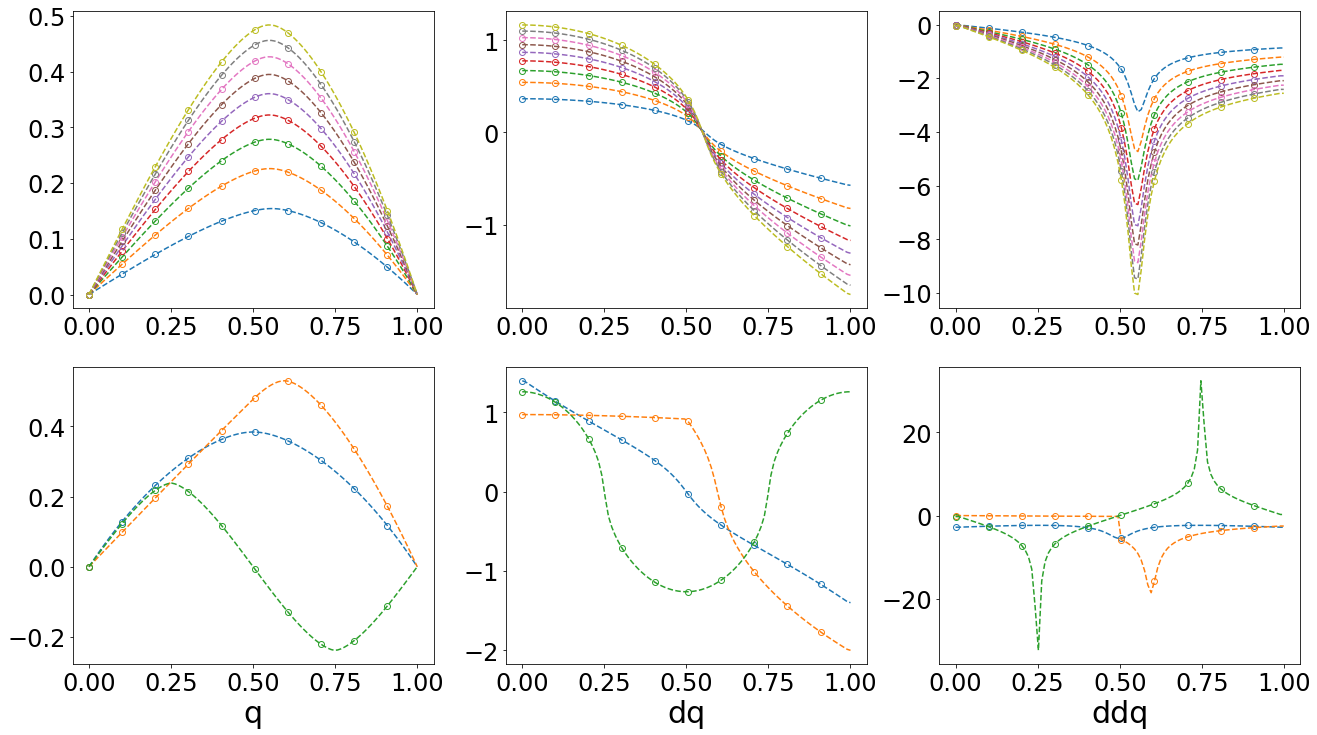

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=((22,12)))

for i in range(q.shape[0]):
    # Training data
    ax[0,0].plot(yy, q[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[0,1].plot(yy, dq[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[0,2].plot(yy, ddq[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)

for i in range(q_test.shape[0]):
    # Training data
    ax[1,0].plot(yy, q_test[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[1,1].plot(yy, dq_test[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[1,2].plot(yy, ddq_test[i, :],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
  
ax[1,0].set_xlabel("q")  
ax[1,1].set_xlabel("dq") 
ax[1,2].set_xlabel("ddq") 



Text(0.5, 0, 'source')

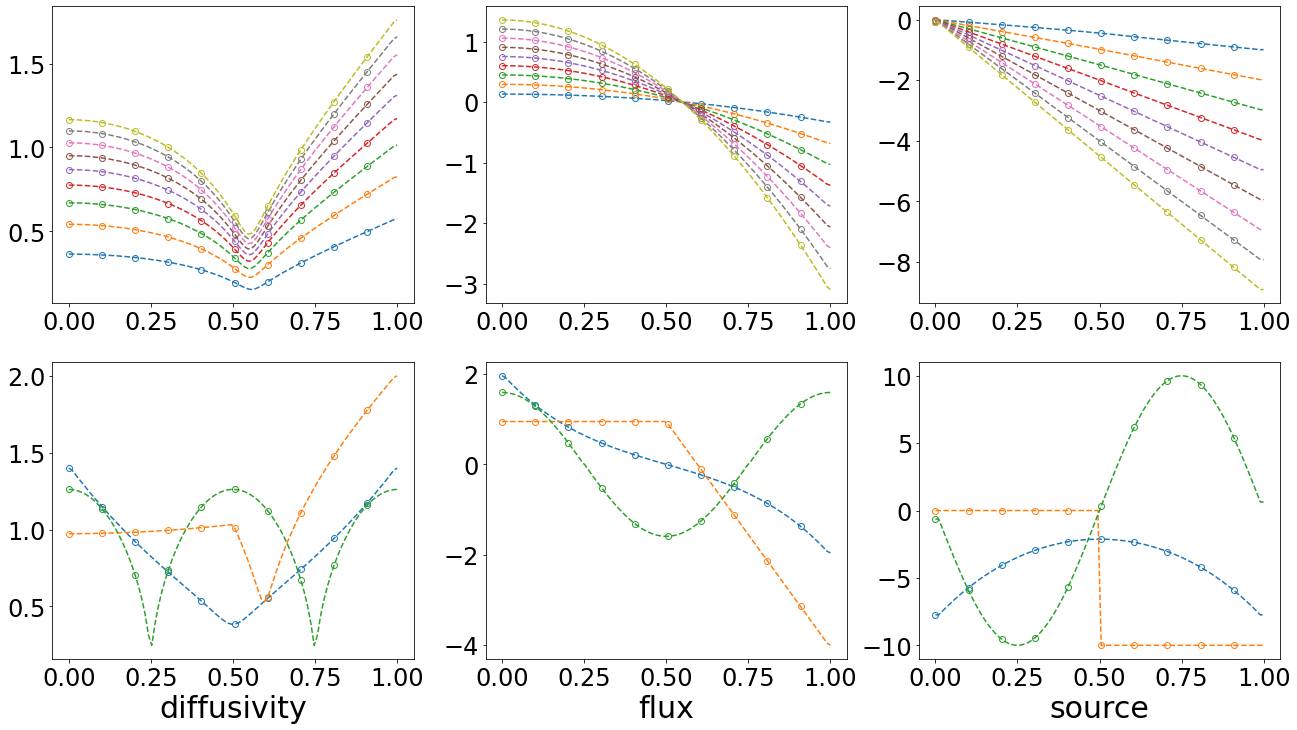

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=((22,12)))

for i in range(q.shape[0]):
    # Training data
    ax[0,0].plot(yy, mu[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[0,1].plot(yy, flux[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[0,2].plot(yy, source[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)

for i in range(q_test.shape[0]):
    # Training data
    ax[1,0].plot(yy, mu_test[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[1,1].plot(yy, flux_test[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
    ax[1,2].plot(yy, source_test[i,:],  "--o", color="C"+str(i), fillstyle="none", markevery=10)
  
ax[1,0].set_xlabel("diffusivity")  
ax[1,1].set_xlabel("flux") 
ax[1,2].set_xlabel("source") 

# Training a quadratic function
 $$D(\theta) = \sqrt{\theta^2 + (\frac{\partial \theta}{\partial x})^2}$$

In [9]:
def solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-6, Nt = 500000, save_every = 100000, L=1.0):
    if MODEL == "exp_nummodel":

        model = lambda q, yy, res : nummodel(ref_permeability, q, yy, res)
        yy_ref, t_data_ref, q_data_ref = explicit_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L)

    elif MODEL == "imp_nummodel":

        model = lambda q, yy, res, V : nummodel_jac(ref_permeability, q, yy, res, V, True, D_ref_permeability)  
        yy_ref, t_data_ref, q_data_ref = implicit_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L)

    elif MODEL == "imp_Newton_nummodel":

        model = lambda q, yy, res, V : nummodel_jac(ref_permeability, q, yy, res, V, True, D_ref_permeability)  
        yy_ref, t_data_ref, q_data_ref = implicit_Newton_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L, Newton_eps = 1e-3, Newton_maxiterstep = 1000)

    else:
        print("ERROR")


    plt.figure()
    plt.plot(yy_ref, q_data_ref[-1, :],  "--o", fillstyle="none", label="q")

    plt.xlabel("y")
    plt.legend()
    plt.show()


 



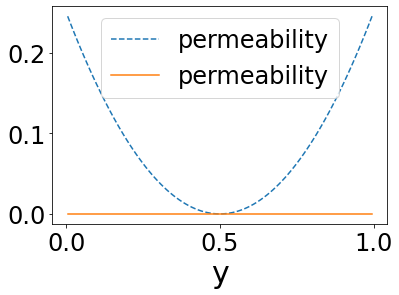

TypeError: ref_permeability() got an unexpected keyword argument 'x'

In [10]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)
#solve(ref_permeability, MODEL = "imp_nummodel", dt = 1.0e-2, Nt = 2000)

In [ ]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = -(yy_c - L/2)**2 
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

#solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)
solve(ref_permeability, MODEL = "imp_nummodel", dt = 1.0e-4, Nt = 2, save_every=1)

In [ ]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 - 0.01
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)


In [ ]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 - 0.01
def ref_permeability(q, dq):
    return q
def D_ref_permeability(q, dq):
    return  np.ones_like(q), np.zeros_like(dq)


# plt.figure()
# plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

# plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

# plt.xlabel("y")
# plt.legend()
# plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 1.0e-5, Nt = 1000000)
